In [298]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [299]:
files = [file for file in os.listdir ('./EPL_teams_2223')]
EPL_2223=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2223", file)) # This line!
    EPL_2223= pd.concat ([EPL_2223, df], ignore_index=True)
EPL_2223.to_csv("EPL_2223.csv",index= False)

EPL_2223.shape

(760, 87)

In [300]:
files = [file for file in os.listdir ('./EPL_teams_2122')]
EPL_2122=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2122", file)) # This line!
    EPL_2122= pd.concat ([EPL_2122, df], ignore_index=True)
EPL_2122.to_csv("EPL_2122.csv",index= False)

EPL_2122.shape

(760, 87)

In [301]:
files = [file for file in os.listdir ('./EPL_teams_2021')]
EPL_2021=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2021", file)) # This line!
    EPL_2021= pd.concat ([EPL_2021, df], ignore_index=True)
EPL_2021.to_csv("EPL_2021.csv",index= False)

EPL_2021.shape

(760, 87)

In [302]:
files = [file for file in os.listdir ('./EPL_teams_1920')]
EPL_1920=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_1920", file)) # This line!
    EPL_1920= pd.concat ([EPL_1920, df], ignore_index=True)
EPL_1920.to_csv("EPL_1920.csv",index= False)

EPL_1920.shape

(760, 87)

In [303]:

df_EPL = pd.concat([EPL_2223, EPL_2122, EPL_2021, EPL_1920], ignore_index=True)

df_EPL.fillna(0, inplace=True)
df_EPL = df_EPL.drop(['Rk', 'Comp', 'Match Report'], axis=1)

In [304]:
for i, row in df_EPL.iterrows():
    string = row['Result']
    if string[0] == 'W':
        df_EPL.loc[i, 'Result'] = 'W'
    if string[0] == 'L':
        df_EPL.loc[i, 'Result'] = 'L'
    if string[0] == 'D':
        df_EPL.loc[i, 'Result'] = 'D'

df_EPL["Result"] = df_EPL["Result"].map({"W" : 0 , "L" : 2, "D": 1})

In [305]:
df_EPL.columns =['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']
df_EPL = df_EPL.drop(columns=['Poss', 'G-PG', 'PG', 'PKatt', 'PKm', 'G-xG',
                              'npG-npxG', 'A-xAG','PSxG-GA','G/S', 'G/SoT', 
                              'Err', 'FK','xGD', 'npxGD'])

In [306]:
df_EPL.to_csv("EPL_ver1_2223pred.csv",index= False)

In [307]:
df_EPL.columns

Index(['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'OPcmp', 'OPatt',
       'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa', 'OPprg', 'OPdist', 'OPprgdist',
       'SPcmp', 'SPatt', 'SP%', 'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt',
       'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl',
       'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'xG',
       'npxG', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'PSxG',
       'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff', 'Toffpa',
       'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR'],
      dtype='object')

# OPP TABLE

In [308]:
constr_cols = ['OPcmp', 'OPatt',
               'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa', 'OPprg', 'OPdist', 'OPprgdist',
               'SPcmp', 'SPatt', 'SP%', 'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt',
               'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl',
               'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'xG',
               'npxG', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'PSxG',
               'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff', 'Toffpa',
               'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
               'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']

constr_cols_away = ['OPP_SoT%', 'OPP_LP%', 'OPP_Rec', 'OPP_MPatt', 'OPP_npxG/S', 'OPP_Tkloff', 'OPP_KP', 'OPP_SPatt',
                    'OPP_DTkl%', 'OPP_Tdef', 'OPP_MPcmp', 'OPP_C2pa', 'OPP_Clr', 'OPP_CarrDist', 'OPP_PrgR', 'OPP_Carr2fin',
                    'OPP_TklW', 'OPP_BP', 'OPP_LPatt', 'OPP_TklInt', 'OPP_xG', 'OPP_xAG', 'OPP_OP2fin', 'OPP_OPatt',
                    'OPP_CarrF','OPP_OPdist', 'OPP_CarrPrg', 'OPP_Tlive', 'OPP_Tkl', 'OPP_Sdist', 'OPP_CarrPrgDist',
                    'OPP_Tklmid', 'OPP_DTkl','OPP_Blocks', 'OPP_BS', 'OPP_SoT', 'OPP_Tdefpa', 'OPP_Carr', 'OPP_Touches',
                    'OPP_MP%', 'OPP_LPcmp', 'OPP_SPcmp','OPP_Tkldef', 'OPP_CarrD', 'OPP_PSxG/SoT', 'OPP_Toff',
                    'OPP_OPprgdist', 'OPP_OP%', 'OPP_Tmid', 'OPP_OP2pa','OPP_LostTkl', 'OPP_SP%', 'OPP_xA', 'OPP_OPprg',
                    'OPP_Int', 'OPP_npxG', 'OPP_TotS', 'OPP_PSxG', 'OPP_Toffpa',
                    'OPP_OPcmp', 'OPP_Carr2pa', 'OPP_Dtkl']

'''
df_EPL_opp = df_EPL.copy()

for i in constr_cols:
    df[i] = ''

for j, row in df_EPL.iterrows():
    for k, r in df_EPL.iterrows():
        if row['Team'] == r['Opp'] and row['Date'] == r['Date']:
            for i in constr_cols:
                df_EPL_opp.loc[k, f'OPP_{i}'] = df_EPL_opp.loc[j, i]
                constr_cols_away.append(f'OPP_{i}')
            continue

df_EPL_opp.to_csv("EPL_opp_2223_prediction.csv",index= False)'''

In [309]:
df_EPL_opp = pd.read_csv("EPL_opp_2223_prediction.csv", sep = ",")

constr_cols_away = ['OPP_SoT%', 'OPP_LP%', 'OPP_Rec', 'OPP_MPatt', 'OPP_npxG/S', 'OPP_Tkloff', 'OPP_KP', 'OPP_SPatt',
            'OPP_DTkl%', 'OPP_Tdef', 'OPP_MPcmp', 'OPP_C2pa', 'OPP_Clr', 'OPP_CarrDist', 'OPP_PrgR', 'OPP_Carr2fin',
            'OPP_TklW', 'OPP_BP', 'OPP_LPatt', 'OPP_TklInt', 'OPP_xG', 'OPP_xAG', 'OPP_OP2fin', 'OPP_OPatt', 'OPP_CarrF',
            'OPP_OPdist', 'OPP_CarrPrg', 'OPP_Tlive', 'OPP_Tkl', 'OPP_Sdist', 'OPP_CarrPrgDist', 'OPP_Tklmid', 'OPP_DTkl',
            'OPP_Blocks', 'OPP_BS', 'OPP_SoT', 'OPP_Tdefpa', 'OPP_Carr', 'OPP_Touches', 'OPP_MP%', 'OPP_LPcmp', 'OPP_SPcmp',
            'OPP_Tkldef', 'OPP_CarrD', 'OPP_PSxG/SoT', 'OPP_Toff', 'OPP_OPprgdist', 'OPP_OP%', 'OPP_Tmid', 'OPP_OP2pa',
            'OPP_LostTkl', 'OPP_SP%', 'OPP_xA', 'OPP_OPprg', 'OPP_Int', 'OPP_npxG', 'OPP_TotS', 'OPP_PSxG', 'OPP_Toffpa',
            'OPP_OPcmp', 'OPP_Carr2pa', 'OPP_Dtkl']
homecols = ['OPcmp', 'OPatt','OP%', 'KP',
       'OP2fin', 'OP2pa', 'C2pa', 'OPprg', 'OPdist', 'OPprgdist',
       'SPcmp', 'SPatt', 'SP%', 'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt',
       'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl',
       'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'xG',
       'npxG', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'Touches',
       'Tdefpa', 'Tdef', 'Tmid', 'Toff', 'Toffpa',
       'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']

awaycols = ['OPP_OPcmp', 'OPP_OPatt', 'OPP_OP%', 'OPP_KP', 'OPP_OP2fin', 'OPP_OP2pa', 'OPP_C2pa', 'OPP_OPprg',
            'OPP_OPdist', 'OPP_OPprgdist', 'OPP_SPcmp', 'OPP_SPatt', 'OPP_SP%', 'OPP_MPcmp', 'OPP_MPatt',
            'OPP_MP%', 'OPP_LPcmp', 'OPP_LPatt', 'OPP_LP%', 'OPP_Tkl', 'OPP_TklW', 'OPP_Tkldef', 'OPP_Tklmid',
            'OPP_Tkloff', 'OPP_DTkl', 'OPP_Dtkl', 'OPP_DTkl%', 'OPP_LostTkl', 'OPP_Blocks', 'OPP_BS', 'OPP_BP',
            'OPP_Int', 'OPP_TklInt', 'OPP_Clr', 'OPP_xG', 'OPP_npxG', 'OPP_xAG', 'OPP_xA', 'OPP_npxG/S', 'OPP_TotS',
            'OPP_SoT', 'OPP_SoT%', 'OPP_Sdist', 'OPP_Touches', 'OPP_Tdefpa', 'OPP_Tdef', 'OPP_Tmid', 'OPP_Toff',
            'OPP_Toffpa', 'OPP_Tlive', 'OPP_Carr', 'OPP_CarrDist', 'OPP_CarrPrgDist', 'OPP_CarrPrg', 'OPP_Carr2fin',
            'OPP_Carr2pa', 'OPP_CarrF', 'OPP_CarrD', 'OPP_Rec', 'OPP_PrgR']

psxgcols = ['PSxG','PSxG/SoT','OPP_PSxG/SoT','OPP_PSxG']

columnsTitles = ['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD'] + homecols + awaycols + psxgcols

df_EPL_opp = df_EPL_opp.reindex(columns=columnsTitles)
df_EPL_opp.fillna(0, inplace=True)
df_EPL_opp

,Team,Date,Opp,Result,GF,GA,GD,OPcmp,OPatt,OP%,...,OPP_Carr2fin,OPP_Carr2pa,OPP_CarrF,OPP_CarrD,OPP_Rec,OPP_PrgR,PSxG,PSxG/SoT,OPP_PSxG/SoT,OPP_PSxG
0,Arsenal,2023-05-28,Wolves,0,5,0,5,418,484,86.4,...,7.0,3.0,10.0,9.0,400.0,22.0,0.0,0.00,0.37,2.9
1,Arsenal,2023-05-20,Nott'ham Forest,2,0,1,-1,665,764,87.0,...,3.0,2.0,13.0,4.0,83.0,10.0,0.5,0.27,0.07,0.2
2,Arsenal,2023-05-14,Brighton,2,0,3,-3,292,387,75.5,...,15.0,5.0,8.0,8.0,446.0,16.0,1.8,0.32,0.12,0.2
3,Arsenal,2023-05-07,Newcastle Utd,0,2,0,2,291,374,77.8,...,12.0,9.0,13.0,13.0,346.0,38.0,0.8,0.16,0.31,1.7
4,Arsenal,2023-05-02,Chelsea,0,3,1,2,485,577,84.1,...,12.0,5.0,12.0,8.0,394.0,25.0,1.4,0.34,0.34,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,Wolves,2019-09-14,Chelsea,2,2,5,-3,387,508,76.2,...,17.0,5.0,20.0,12.0,502.0,38.0,3.2,0.54,0.28,1.1
3036,Wolves,2019-09-01,Everton,2,2,3,-1,236,365,64.7,...,23.0,6.0,21.0,12.0,389.0,49.0,1.8,0.30,0.54,2.7
3037,Wolves,2019-08-25,Burnley,1,1,1,0,500,635,78.7,...,9.0,2.0,14.0,4.0,218.0,24.0,0.9,0.22,0.11,1.2
3038,Wolves,2019-08-19,Manchester Utd,1,1,1,0,279,385,72.5,...,20.0,2.0,17.0,9.0,603.0,41.0,1.1,0.06,0.37,0.7


# RANDOM FOREST MODEL TRAINING

In [975]:
X_opp = df_EPL_opp[df_EPL_test_opp['Date'] < '2022-10-13'].drop(columns=['Date', 'Result', 'GF', 'GA', 'GD'], axis=1)

y_opp = df_EPL_opp[df_EPL_test_opp['Date'] < '2022-10-13']['GF']


X_train_opp, X_test_opp, y_train_opp, y_test_opp = train_test_split(X_opp, y_opp, test_size = 0.3, random_state = 0)

In [976]:
encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train_opp = encoder.fit_transform(X_train_opp)
X_test_opp = encoder.transform(X_test_opp)
sta = StandardScaler()
X_train_opp = sta.fit_transform(X_train_opp)
X_test_opp = sta.transform(X_test_opp)

rfc_opp = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15,n_jobs=-1)
rfc_opp.fit(X_train_opp, y_train_opp)

# Evaluating on Training set
y_pred_train_opp = rfc_opp.predict_proba(X_train_opp)
#print(classification_report(y_train_opp, y_pred_train_opp))

y_pred_test_opp = rfc_opp.predict_proba(X_test_opp)
#print(classification_report(y_test_opp, y_pred_test_opp))

y_pred_test_opp

array([[0.5 , 0.37, 0.09, ..., 0.  , 0.  , 0.  ],
       [0.19, 0.42, 0.29, ..., 0.  , 0.  , 0.  ],
       [0.41, 0.36, 0.18, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.03, 0.2 , 0.29, ..., 0.01, 0.  , 0.  ],
       [0.29, 0.4 , 0.27, ..., 0.  , 0.  , 0.  ],
       [0.18, 0.45, 0.26, ..., 0.  , 0.  , 0.  ]])

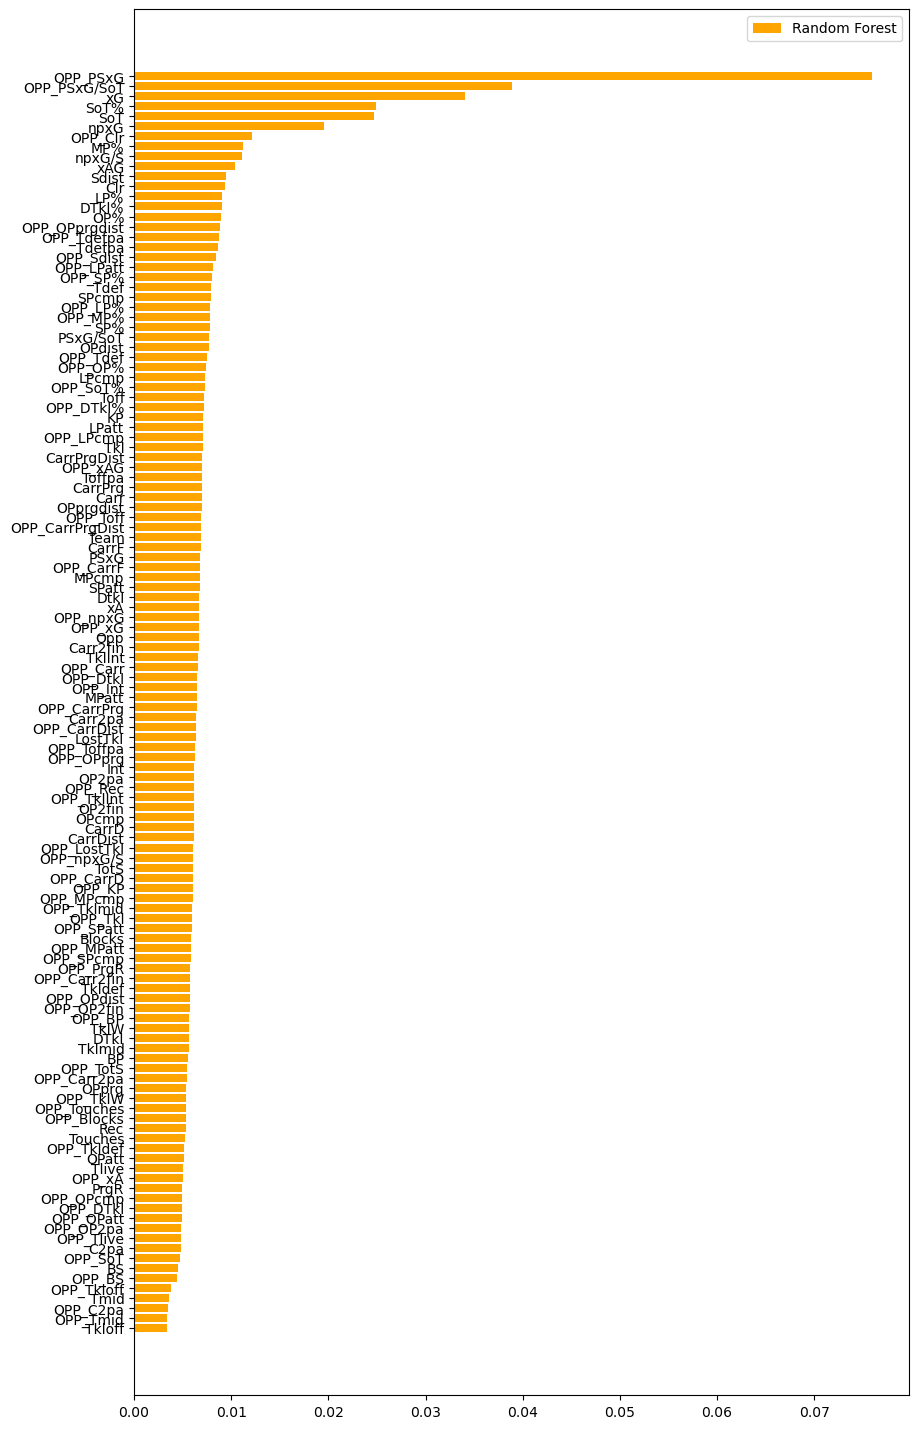

In [977]:
feature_importance_opp = pd.DataFrame({'rfc':rfc_opp.feature_importances_},index = df_EPL_opp.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD']).columns)
feature_importance_opp.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance_opp))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature_opp = ax.barh(index, feature_importance_opp['rfc'], color = 'orange', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance_opp.index)

ax.legend()
plt.savefig("myImagePDF_opp.pdf", format="pdf", bbox_inches="tight")
plt.show()

# FUNCTIONS FOR GAME SIMULATION

In [978]:
def teamDF(team, df):
    return df[df.Team == team].drop(columns=['Result', 'GF', 'GA', 'GD'], axis=1).reset_index(drop=True)

In [979]:
def calculate_mean_random_optimized(df_tmp, col, num_samples=10):
    unique_values, counts = np.unique(df_tmp[col], return_counts=True)
    probabilities = counts / len(df_tmp)
    random_sample = np.random.choice(unique_values, num_samples, p=probabilities)
    first10 = df_tmp.loc[:num_samples, col]
    return round(((sum(random_sample)/len(random_sample)) + 3*(sum(first10)/len(first10)))*0.25,2)


In [980]:
def goalSim(home, away, df, rfc):
    df_home = teamDF(home, df)
    df_away = teamDF(away, df)
    columns = ['Team', 'Opp'] + homecols + awaycols + psxgcols
    sim = pd.DataFrame(columns=columns)
    
    sim.at[0, 'Team'] = home
    sim.at[0, 'Opp'] = away
    
      
    # Calculate means for homecols
    for col in homecols:
        sim.at[0, col] = calculate_mean_random_optimized(df_home, col)

    # Calculate means for awaycols
    for col in awaycols:
        sim.at[0, col] = calculate_mean_random_optimized(df_away, col[4:])
    
    # Calculate means for psxgcols
    for col in psxgcols:
        sim.at[0, col] = calculate_mean_random_optimized(df_home if 'OPP' in col else df_away, col if 'OPP' in col else f'OPP_{col}')
    
    
    sim = encoder.transform(sim)
    sim = sta.transform(sim)
    
    prob_list = rfc.predict_proba(sim).tolist()
    fin = [prob_list[0][0],prob_list[0][1],prob_list[0][2],prob_list[0][3],sum(prob_list[0][4:])]
    
    return fin

In [981]:
def simulateGame(h_goals, a_goals):
    goals = [0, 1, 2, 3, 4]
    
    h_goal_actual = np.random.choice(goals, 1, p=h_goals)[0]
    a_goal_actual = np.random.choice(goals, 1, p=a_goals)[0]
    
    result = 0
    
    if h_goal_actual > a_goal_actual:
        result = 0
    elif a_goal_actual > h_goal_actual:
        result = 2
    else:
        result = 1
    
    return (result, h_goal_actual, a_goal_actual)

# DATA READING FOR LEAGUE TABLES AND FIXTURE LISTS

In [982]:
df_EPL_fixt = pd.read_csv("fixtures_2223.csv", sep = ",")
df_EPL_fixt = df_EPL_fixt.replace('Man City', 'Manchester City')
df_EPL_fixt = df_EPL_fixt.replace('Spurs', 'Tottenham')
df_EPL_fixt = df_EPL_fixt.replace('Man Utd', 'Manchester Utd')
df_EPL_fixt = df_EPL_fixt.replace('Newcastle', 'Newcastle Utd')
df_EPL_fixt = df_EPL_fixt.replace('Leeds', 'Leeds United')
df_EPL_fixt = df_EPL_fixt.replace('Leicester', 'Leicester City')
df_EPL_fixt = df_EPL_fixt.replace('Nottingham Forest', "Nott'ham Forest")
df_EPL_fixt['Date'] = pd.to_datetime(df_EPL_fixt['Date'], format='%d/%m/%Y %H:%M').dt.strftime('%Y-%m-%d')

In [983]:
gameweeks_left = []

crt_gw = 11

for i in range(crt_gw, 39):
    gw = []
    for j, row in df_EPL_fixt.iterrows():
        if row['Round Number'] == i:
            tmp = [row['Home Team'], row['Away Team'], row['Date']]
            gw.append(tmp)
    gameweeks_left.append(gw)

In [984]:
df_EPL_odds = pd.read_csv("EPL_2223_odds.csv", sep = ",")
df_EPL_odds = df_EPL_odds.replace('Man City', 'Manchester City')
df_EPL_odds = df_EPL_odds.replace('Spurs', 'Tottenham')
df_EPL_odds = df_EPL_odds.replace('Man United', 'Manchester Utd')
df_EPL_odds = df_EPL_odds.replace('Newcastle', 'Newcastle Utd')
df_EPL_odds = df_EPL_odds.replace('Leeds', 'Leeds United')
df_EPL_odds = df_EPL_odds.replace('Leicester', 'Leicester City')
df_EPL_odds = df_EPL_odds.replace("Nott'm Forest", "Nott'ham Forest")
df_EPL_odds['Date'] = pd.to_datetime(df_EPL_odds['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# Odds generation for betting from game simulation functions

In [1027]:

startall = time.time()

odds_list=[]

df_epl_test_all = df_EPL_cnt_table.copy()
df_EPL_test_opp = df_EPL_opp.copy()

N = 10000

for j in gameweeks_left:
    for k in j:  
        result_list = [[],[],[]]
        result_h = goalSim(k[0],k[1],df_EPL_test_opp[df_EPL_test_opp['Date'] < k[2]],rfc_opp)
        result_a = goalSim(k[1],k[0],df_EPL_test_opp[df_EPL_test_opp['Date'] < k[2]],rfc_opp)
        for j in range(N):
            result = simulateGame(result_h,result_a)
            result_list[result[0]].append(1)
        game = [k[0],k[1],sum(result_list[0])/N,sum(result_list[1])/N,sum(result_list[2])/N]
        odds_list.append(game)
endall = time.time()
print(endall - startall)

387.3407428264618


In [1066]:
odds_list_columns=['Home','Away','predH','predD','predA']
df_odds_list = pd.DataFrame(odds_list, columns=odds_list_columns)
df_odds_list.to_csv("EPL2223predictions.csv",index= False)
odds_list

[['Brentford', 'Brighton', 0.2857, 0.3704, 0.3439],
 ['Leicester City', 'Crystal Palace', 0.3329, 0.4375, 0.2296],
 ['Fulham', 'Bournemouth', 0.2916, 0.4919, 0.2165],
 ['Wolves', "Nott'ham Forest", 0.3288, 0.4126, 0.2586],
 ['Tottenham', 'Everton', 0.5952, 0.2857, 0.1191],
 ['Aston Villa', 'Chelsea', 0.1445, 0.3469, 0.5086],
 ['Leeds United', 'Arsenal', 0.1471, 0.2665, 0.5864],
 ['Manchester Utd', 'Newcastle Utd', 0.3172, 0.3895, 0.2933],
 ['Southampton', 'West Ham', 0.2216, 0.5236, 0.2548],
 ['Liverpool', 'Manchester City', 0.1868, 0.2441, 0.5691],
 ['Brighton', "Nott'ham Forest", 0.4577, 0.4221, 0.1202],
 ['Crystal Palace', 'Wolves', 0.4543, 0.3672, 0.1785],
 ['Bournemouth', 'Southampton', 0.3217, 0.4649, 0.2134],
 ['Brentford', 'Chelsea', 0.2132, 0.3691, 0.4177],
 ['Newcastle Utd', 'Everton', 0.453, 0.4115, 0.1355],
 ['Liverpool', 'West Ham', 0.6725, 0.2078, 0.1197],
 ['Manchester Utd', 'Tottenham', 0.1872, 0.3308, 0.482],
 ['Fulham', 'Aston Villa', 0.2434, 0.5055, 0.2511],
 ['Leice

# FUNCTIONS FOR BETTING

In [1073]:
def betOdds(win, draw, loss):
    odd_win = 1/(win)
    odd_draw = 1/(draw)
    odd_loss = 1/(loss)
    return odd_win, odd_draw, odd_loss

In [1074]:
def makeBet(odds,df_odds):
    madeBets=[]
    for game in odds:
        predH, predD, predA = betOdds(game[2], game[3], game[4])
        home_team = game[0]
        away_team = game[1]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]

        
        result = result.iloc[0]  # Assuming you want the first matching row
        betH, betD, betA = result['MaxH'], result['MaxD'], result['MaxA']
        diff = [home_team, away_team, predH - betH, predD - betD, predA - betA]
        for i, item in enumerate(diff[2:]):
            if item<-0.5:
                if i==0 and predH < 2.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 2.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 2.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
        
    return madeBets

In [1223]:
def makeBetConservative(odds,df_odds):
    madeBets=[]
    for game in odds:
        predH, predD, predA = betOdds(game[2], game[3], game[4])
        home_team = game[0]
        away_team = game[1]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]

        
        result = result.iloc[0]  # Assuming you want the first matching row
        betH, betD, betA = result['MaxH'], result['MaxD'], result['MaxA']
        diff = [home_team, away_team, predH - betH, predD - betD, predA - betA]
        for i, item in enumerate(diff[2:]):
            if item<-0.5:
                if i==0 and predH < 2.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 2.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 2.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
        
    return madeBets

In [1224]:
def makeBetIntermediate(odds,df_odds):
    madeBets=[]
    for game in odds:
        predH, predD, predA = betOdds(game[2], game[3], game[4])
        home_team = game[0]
        away_team = game[1]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]

        
        result = result.iloc[0]  # Assuming you want the first matching row
        betH, betD, betA = result['MaxH'], result['MaxD'], result['MaxA']
        diff = [home_team, away_team, predH - betH, predD - betD, predA - betA]
        for i, item in enumerate(diff[2:]):
            if item<-1.0:
                if i==0 and predH < 5.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 5.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 5.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
            elif item<-0.5:
                if i==0 and predH < 2.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 2.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 2.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
        
    return madeBets

In [1225]:
def makeBetAgressive(odds,df_odds):
    madeBets=[]
    for game in odds:
        predH, predD, predA = betOdds(game[2], game[3], game[4])
        home_team = game[0]
        away_team = game[1]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]

        
        result = result.iloc[0]  # Assuming you want the first matching row
        betH, betD, betA = result['MaxH'], result['MaxD'], result['MaxA']
        diff = [home_team, away_team, predH - betH, predD - betD, predA - betA]
        for i, item in enumerate(diff[2:]):
            if item<-2.0:
                if i==0 and predH < 8.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 8.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 8.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
            elif item<-1.0:
                if i==0 and predH < 5.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 5.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 5.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)      
            
            elif item<-0.5:
                if i==0 and predH < 2.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 2.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 2.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
            
        
    return madeBets

In [1226]:
def makeBetUAgressive(odds,df_odds):
    madeBets=[]
    for game in odds:
        predH, predD, predA = betOdds(game[2], game[3], game[4])
        home_team = game[0]
        away_team = game[1]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]

        
        result = result.iloc[0]  # Assuming you want the first matching row
        betH, betD, betA = result['MaxH'], result['MaxD'], result['MaxA']
        diff = [home_team, away_team, predH - betH, predD - betD, predA - betA]
        for i, item in enumerate(diff[2:]):
            if item<-4.5:
                if i==0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
            elif item<-2.0:
                if i==0 and predH < 8.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 8.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 8.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
            elif item<-1.0:
                if i==0 and predH < 5.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 5.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 5.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)      
            
            elif item<-0.5:
                if i==0 and predH < 2.0:
                    bet = [home_team, away_team,'H',betH,round(predH,2)]
                    madeBets.append(bet)
                elif i==1 and predD < 2.0:
                    bet = [home_team, away_team,'D',betD,round(predD,2)]
                    madeBets.append(bet)
                elif i==2 and predA < 2.0:
                    bet = [home_team, away_team,'A',betA,round(predA,2)]
                    madeBets.append(bet)
            
            
        
    return madeBets

In [1075]:
def betResolution(betList, df_odds, betSize):
    
    for game in betList:
        home_team = game[0]
        away_team = game[1]
        pred_result = game[2]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]
        result = result.iloc[0]  # Assuming you want the first matching row
        gameResult = result['FTR']
        
        prize = 0
        
        if gameResult == pred_result:
            prize = game[3]*betSize-betSize
        else:
            prize = -betSize
        game.append(gameResult)
        game.append(prize)
        
    return betList

In [1076]:
def betKelly(betList, df_odds, cash):
    
    for game in betList:
        home_team = game[0]
        away_team = game[1]
        pred_result = game[2]

        # Use boolean indexing to get the corresponding row from df_EPL_odds
        result = df_EPL_odds[(df_odds['HomeTeam'] == home_team) & (df_odds['AwayTeam'] == away_team)]
        result = result.iloc[0]  # Assuming you want the first matching row
        gameResult = result['FTR']
        prob = 1/game[4]
        
        fraction = max((prob*game[3]-1)/(game[3]-1),0)
        betSize = fraction*cash*0.17
        if gameResult == pred_result:
            prize = game[3]*betSize-betSize
        else:
            prize = -betSize
        cash+=prize
        game.append(gameResult)
        game.append(prize)
        game.append(cash)
        
    return betList

# Betting resolutions

In [1077]:
final = betResolution(makeBet(odds_list,df_EPL_odds), df_EPL_odds,1)
sum1 = 0
for i in final:
    sum1 += i[-1]
    print(i)
sum1

['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 2.6]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -1]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 1.5099999999999998]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A', -1]
['Brentford', 'Wolves', 'H', 2.28, 1.74, 'D', -1]
['Everton', 'Leicester City', 'D', 3.5, 1.97, 'A', -1]
['Chelsea', 'Arsenal', 'A', 2.85, 1.78, 'A', 1.85]
['Tottenham', 'Liverpool', 'A', 2.25, 1.65, 'A', 1.25]
['Newcastle Utd', 'Chelsea', 'H', 2.42, 1.83, 'H', 1.42]
['Southampton', 'Brighton', 'D', 3.66, 1.91, 'A', -1]
['Leeds United', 'West Ham', 'D', 3.7, 1.88, 'D', 2.7]
['Aston Villa', 'Wolves', 'D', 3.76, 1.78, 'D', 2.76]
['Brighton', 'Liverpool', 'A', 2.2, 1.65, 'H', -1]
['Wolves', 'West Ham', 'D', 3.41, 1.9, 'H', -1]
['Southampton', 'Aston Villa', 'D', 3.5, 1.93, 'A', -1]
['Crystal Palace', 'Newcastle Utd', 'D', 3.83, 1.82, 'D', 2.83]
['Newcastle Utd', 'West Ham', 'D', 4.1, 1.88, 'D', 3.0999999999999996]
['West Ham', 'Chelsea', 'D', 3.41, 2.0, 'D', 2.

7.34

In [1078]:
final = betKelly(makeBet(odds_list,df_EPL_odds), df_EPL_odds,1000)
for i in final:
    print(i)

['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 150.41884816753927, 1150.4188481675392]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -61.25478167362984, 1089.1640664939093]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 74.47691717254438, 1163.6409836664536]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A', -74.67079592816157, 1088.970187738292]
['Brentford', 'Wolves', 'H', 2.28, 1.74, 'D', -44.88481646658367, 1044.0853712717083]
['Everton', 'Leicester City', 'D', 3.5, 1.97, 'A', -55.14042742492817, 988.9449438467801]
['Chelsea', 'Arsenal', 'A', 2.85, 1.78, 'A', 101.06128386838728, 1090.0062277151674]
['Tottenham', 'Liverpool', 'A', 2.25, 1.65, 'A', 67.38220316784674, 1157.388430883014]
['Newcastle Utd', 'Chelsea', 'H', 2.42, 1.83, 'H', 63.43500525550072, 1220.8234361385148]
['Southampton', 'Brighton', 'D', 3.66, 1.91, 'A', -71.48662997504394, 1149.3368061634708]
['Leeds United', 'West Ham', 'D', 3.7, 1.88, 'D', 189.15149352498824, 1338.488299688459]
['Aston Villa', 'Wolves', 

In [1227]:
final = betKelly(makeBetConservative(odds_list,df_EPL_odds), df_EPL_odds,1000)
for i in final:
    print(i)

['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 150.41884816753927, 1150.4188481675392]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -61.25478167362984, 1089.1640664939093]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 74.47691717254438, 1163.6409836664536]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A', -74.67079592816157, 1088.970187738292]
['Brentford', 'Wolves', 'H', 2.28, 1.74, 'D', -44.88481646658367, 1044.0853712717083]
['Everton', 'Leicester City', 'D', 3.5, 1.97, 'A', -55.14042742492817, 988.9449438467801]
['Chelsea', 'Arsenal', 'A', 2.85, 1.78, 'A', 101.06128386838728, 1090.0062277151674]
['Tottenham', 'Liverpool', 'A', 2.25, 1.65, 'A', 67.38220316784674, 1157.388430883014]
['Newcastle Utd', 'Chelsea', 'H', 2.42, 1.83, 'H', 63.43500525550072, 1220.8234361385148]
['Southampton', 'Brighton', 'D', 3.66, 1.91, 'A', -71.48662997504394, 1149.3368061634708]
['Leeds United', 'West Ham', 'D', 3.7, 1.88, 'D', 189.15149352498824, 1338.488299688459]
['Aston Villa', 'Wolves', 

In [1228]:
final = betKelly(makeBetIntermediate(odds_list,df_EPL_odds), df_EPL_odds,1000)
for i in final:
    print(i)

['Leicester City', 'Crystal Palace', 'D', 3.68, 2.29, 'D', 103.18777292576424, 1103.1877729257642]
['Fulham', 'Bournemouth', 'D', 3.9, 2.03, 'D', 172.76029212468012, 1275.9480650504443]
['Wolves', "Nott'ham Forest", 'D', 3.9, 2.42, 'H', -45.743592642731805, 1230.2044724077125]
['Wolves', "Nott'ham Forest", 'A', 5.5, 3.87, 'H', -19.57448517394069, 1210.6299872337718]
['Tottenham', 'Everton', 'D', 4.75, 3.5, 'H', -19.600675983784868, 1191.029311249987]
['Manchester Utd', 'Newcastle Utd', 'D', 4.0, 2.57, 'D', 112.66117726259606, 1303.690488512583]
['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 196.09962164903934, 1499.7901101616224]
['Brighton', "Nott'ham Forest", 'D', 5.2, 2.37, 'D', 304.45106413449633, 1804.2411742961187]
['Bournemouth', 'Southampton', 'D', 3.42, 2.15, 'A', -74.86751288305439, 1729.3736614130644]
['Brentford', 'Chelsea', 'D', 4.28, 2.71, 'D', 170.32097056499893, 1899.6946319780634]
['Newcastle Utd', 'Everton', 'D', 4.3, 2.43, 'H', -75.31025358596162, 1824.384378392101

In [1229]:
final = betKelly(makeBetAgressive(odds_list,df_EPL_odds), df_EPL_odds,1000)
for i in final:
    print(i)

['Leicester City', 'Crystal Palace', 'D', 3.68, 2.29, 'D', 103.18777292576424, 1103.1877729257642]
['Fulham', 'Bournemouth', 'D', 3.9, 2.03, 'D', 172.76029212468012, 1275.9480650504443]
['Wolves', "Nott'ham Forest", 'D', 3.9, 2.42, 'H', -45.743592642731805, 1230.2044724077125]
['Wolves', "Nott'ham Forest", 'A', 5.5, 3.87, 'H', -19.57448517394069, 1210.6299872337718]
['Tottenham', 'Everton', 'D', 4.75, 3.5, 'H', -19.600675983784868, 1191.029311249987]
['Manchester Utd', 'Newcastle Utd', 'D', 4.0, 2.57, 'D', 112.66117726259606, 1303.690488512583]
['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 196.09962164903934, 1499.7901101616224]
['Brighton', "Nott'ham Forest", 'D', 5.2, 2.37, 'D', 304.45106413449633, 1804.2411742961187]
['Bournemouth', 'Southampton', 'D', 3.42, 2.15, 'A', -74.86751288305439, 1729.3736614130644]
['Brentford', 'Chelsea', 'D', 4.28, 2.71, 'D', 170.32097056499893, 1899.6946319780634]
['Newcastle Utd', 'Everton', 'D', 4.3, 2.43, 'H', -75.31025358596162, 1824.384378392101

In [1230]:
final = betKelly(makeBetUAgressive(odds_list,df_EPL_odds), df_EPL_odds,1000)
for i in final:
    print(i)

['Leicester City', 'Crystal Palace', 'D', 3.68, 2.29, 'D', 103.18777292576424, 1103.1877729257642]
['Fulham', 'Bournemouth', 'D', 3.9, 2.03, 'D', 172.76029212468012, 1275.9480650504443]
['Wolves', "Nott'ham Forest", 'D', 3.9, 2.42, 'H', -45.743592642731805, 1230.2044724077125]
['Wolves', "Nott'ham Forest", 'A', 5.5, 3.87, 'H', -19.57448517394069, 1210.6299872337718]
['Tottenham', 'Everton', 'D', 4.75, 3.5, 'H', -19.600675983784868, 1191.029311249987]
['Manchester Utd', 'Newcastle Utd', 'D', 4.0, 2.57, 'D', 112.66117726259606, 1303.690488512583]
['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 196.09962164903934, 1499.7901101616224]
['Brighton', "Nott'ham Forest", 'D', 5.2, 2.37, 'D', 304.45106413449633, 1804.2411742961187]
['Bournemouth', 'Southampton', 'D', 3.42, 2.15, 'A', -74.86751288305439, 1729.3736614130644]
['Brentford', 'Chelsea', 'D', 4.28, 2.71, 'D', 170.32097056499893, 1899.6946319780634]
['Newcastle Utd', 'Everton', 'D', 4.3, 2.43, 'H', -75.31025358596162, 1824.384378392101

In [1231]:
final = betResolution(makeBetConservative(odds_list,df_EPL_odds), df_EPL_odds,10)
sum1 = 0
for i in final:
    sum1 += i[-1]
    print(i)
sum1, len(final)

['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 26.0]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -10]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 15.099999999999998]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A', -10]
['Brentford', 'Wolves', 'H', 2.28, 1.74, 'D', -10]
['Everton', 'Leicester City', 'D', 3.5, 1.97, 'A', -10]
['Chelsea', 'Arsenal', 'A', 2.85, 1.78, 'A', 18.5]
['Tottenham', 'Liverpool', 'A', 2.25, 1.65, 'A', 12.5]
['Newcastle Utd', 'Chelsea', 'H', 2.42, 1.83, 'H', 14.2]
['Southampton', 'Brighton', 'D', 3.66, 1.91, 'A', -10]
['Leeds United', 'West Ham', 'D', 3.7, 1.88, 'D', 27.0]
['Aston Villa', 'Wolves', 'D', 3.76, 1.78, 'D', 27.599999999999994]
['Brighton', 'Liverpool', 'A', 2.2, 1.65, 'H', -10]
['Wolves', 'West Ham', 'D', 3.41, 1.9, 'H', -10]
['Southampton', 'Aston Villa', 'D', 3.5, 1.93, 'A', -10]
['Crystal Palace', 'Newcastle Utd', 'D', 3.83, 1.82, 'D', 28.299999999999997]
['Newcastle Utd', 'West Ham', 'D', 4.1, 1.88, 'D', 31.0]
['West Ham', 'Chelsea',

(73.4, 46)

In [1232]:
final = betResolution(makeBetIntermediate(odds_list,df_EPL_odds), df_EPL_odds,10)
sum1 = 0
for i in final:
    sum1 += i[-1]
    print(i)
sum1, len(final)

['Leicester City', 'Crystal Palace', 'D', 3.68, 2.29, 'D', 26.800000000000004]
['Fulham', 'Bournemouth', 'D', 3.9, 2.03, 'D', 29.0]
['Wolves', "Nott'ham Forest", 'D', 3.9, 2.42, 'H', -10]
['Wolves', "Nott'ham Forest", 'A', 5.5, 3.87, 'H', -10]
['Tottenham', 'Everton', 'D', 4.75, 3.5, 'H', -10]
['Manchester Utd', 'Newcastle Utd', 'D', 4.0, 2.57, 'D', 30.0]
['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 26.0]
['Brighton', "Nott'ham Forest", 'D', 5.2, 2.37, 'D', 42.0]
['Bournemouth', 'Southampton', 'D', 3.42, 2.15, 'A', -10]
['Brentford', 'Chelsea', 'D', 4.28, 2.71, 'D', 32.800000000000004]
['Newcastle Utd', 'Everton', 'D', 4.3, 2.43, 'H', -10]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -10]
['Leicester City', 'Leeds United', 'D', 3.7, 2.57, 'H', -10]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 15.099999999999998]
['Aston Villa', 'Brentford', 'D', 3.61, 2.39, 'H', -10]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A', -10]
['Wolves', 'Leicester City', 'D', 3.5, 2.45, 'A', -

(180.3, 247)

In [1236]:
final = betResolution(makeBetAgressive(odds_list,df_EPL_odds), df_EPL_odds,10)
sum1 = 0
for i in final:
    sum1 += i[-1]
    print(i)
sum1, len(final)

['Leicester City', 'Crystal Palace', 'D', 3.68, 2.29, 'D', 26.800000000000004]
['Fulham', 'Bournemouth', 'D', 3.9, 2.03, 'D', 29.0]
['Wolves', "Nott'ham Forest", 'D', 3.9, 2.42, 'H', -10]
['Wolves', "Nott'ham Forest", 'A', 5.5, 3.87, 'H', -10]
['Tottenham', 'Everton', 'D', 4.75, 3.5, 'H', -10]
['Manchester Utd', 'Newcastle Utd', 'D', 4.0, 2.57, 'D', 30.0]
['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 26.0]
['Brighton', "Nott'ham Forest", 'D', 5.2, 2.37, 'D', 42.0]
['Bournemouth', 'Southampton', 'D', 3.42, 2.15, 'A', -10]
['Brentford', 'Chelsea', 'D', 4.28, 2.71, 'D', 32.800000000000004]
['Newcastle Utd', 'Everton', 'D', 4.3, 2.43, 'H', -10]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -10]
['Leicester City', 'Leeds United', 'D', 3.7, 2.57, 'H', -10]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 15.099999999999998]
['Aston Villa', 'Brentford', 'D', 3.61, 2.39, 'H', -10]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A', -10]
['Wolves', 'Leicester City', 'D', 3.5, 2.45, 'A', -

(257.3, 266)

In [1241]:
final = betResolution(makeBetUAgressive(odds_list,df_EPL_odds), df_EPL_odds,10)
sum1 = 0
for i in final:
    if i[-1] == -10:
        sum1 += 1
    print(i)
sum1, len(final)

['Leicester City', 'Crystal Palace', 'D', 3.68, 2.29, 'D', 26.800000000000004]
['Fulham', 'Bournemouth', 'D', 3.9, 2.03, 'D', 29.0]
['Wolves', "Nott'ham Forest", 'D', 3.9, 2.42, 'H', -10]
['Wolves', "Nott'ham Forest", 'A', 5.5, 3.87, 'H', -10]
['Tottenham', 'Everton', 'D', 4.75, 3.5, 'H', -10]
['Manchester Utd', 'Newcastle Utd', 'D', 4.0, 2.57, 'D', 30.0]
['Southampton', 'West Ham', 'D', 3.6, 1.91, 'D', 26.0]
['Brighton', "Nott'ham Forest", 'D', 5.2, 2.37, 'D', 42.0]
['Bournemouth', 'Southampton', 'D', 3.42, 2.15, 'A', -10]
['Brentford', 'Chelsea', 'D', 4.28, 2.71, 'D', 32.800000000000004]
['Newcastle Utd', 'Everton', 'D', 4.3, 2.43, 'H', -10]
['Fulham', 'Aston Villa', 'D', 3.58, 1.98, 'H', -10]
['Leicester City', 'Leeds United', 'D', 3.7, 2.57, 'H', -10]
['Arsenal', 'Manchester City', 'A', 2.51, 1.79, 'A', 15.099999999999998]
['Manchester City', 'Brighton', 'A', 17.0, 9.4, 'H', -10]
['Aston Villa', 'Brentford', 'D', 3.61, 2.39, 'H', -10]
['Leeds United', 'Fulham', 'D', 3.75, 1.84, 'A'

(207, 273)

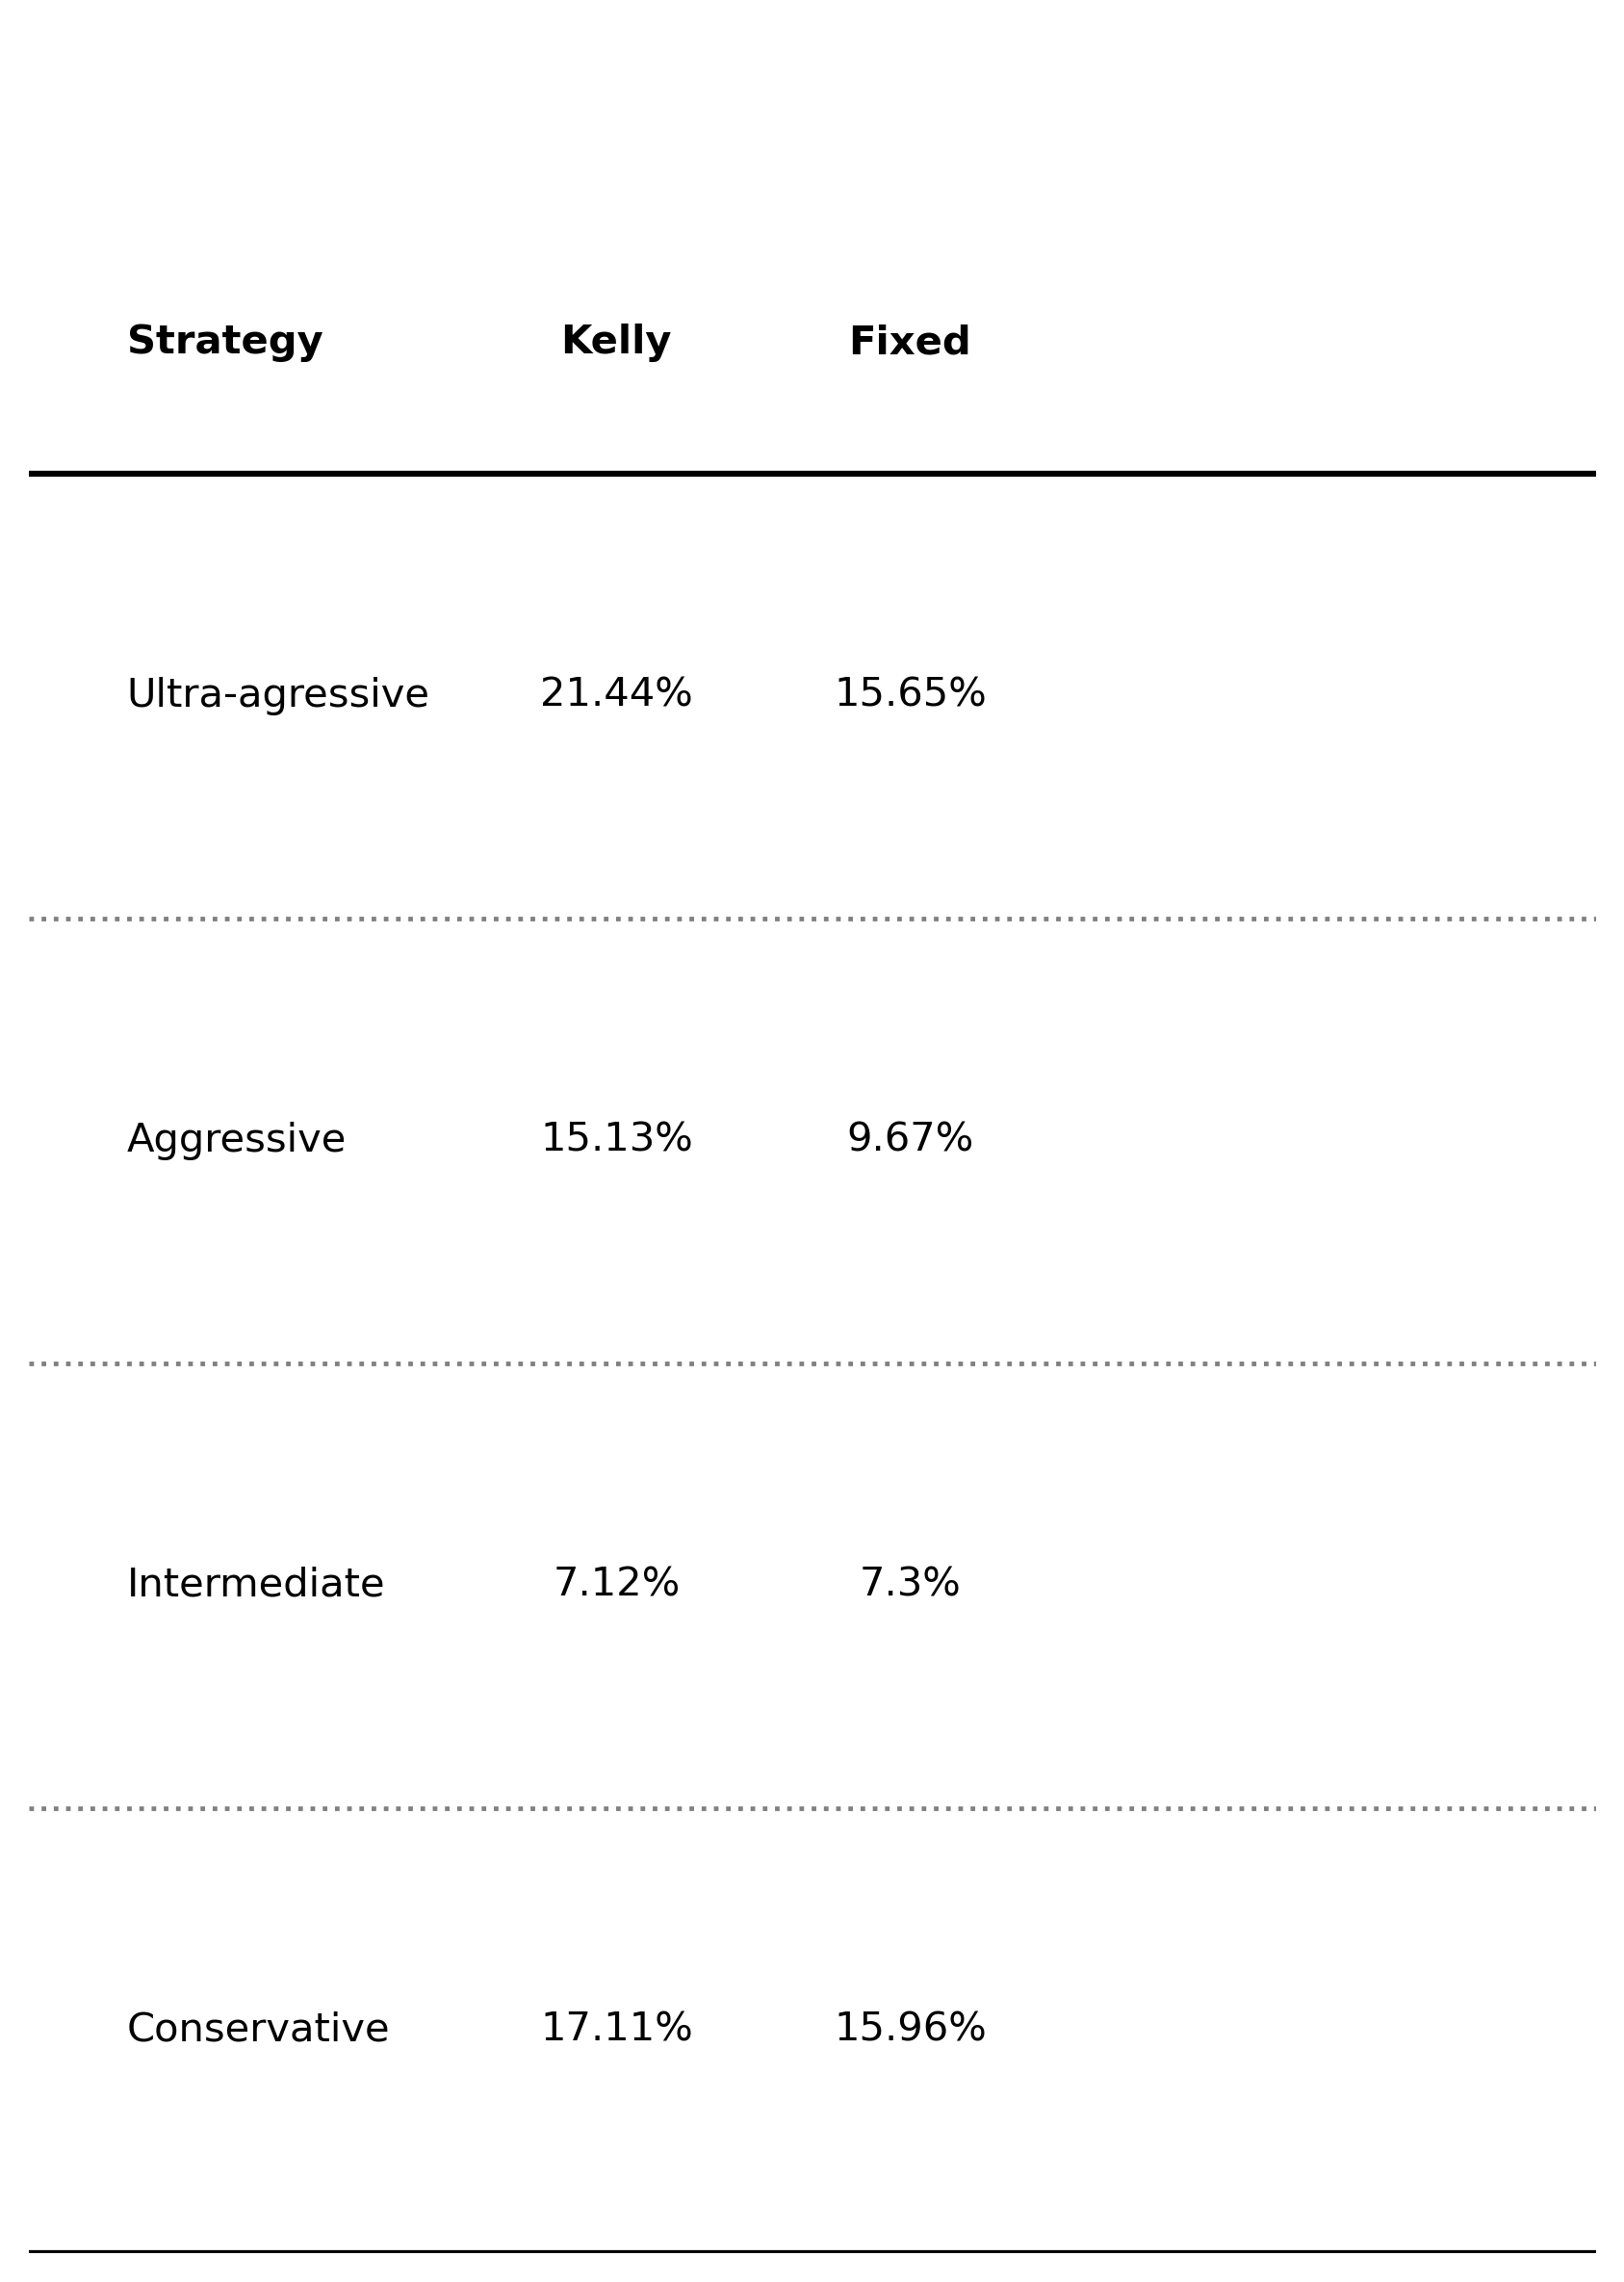

In [1238]:
columns = ['Strategy', 'Kelly', 'Fixed']
bets2df = [['Conservative',f'{round((1171.11-1000)/1000*100,2)}%',f'{15.96}%'],
           ['Intermediate',f'{round((1071.19-1000)/1000*100,2)}%',f'{7.3}%'],
           ['Aggressive',f'{round((1151.26-1000)/1000*100,2)}%',f'{9.67}%'],
           ['Ultra-agressive',f'{round((1214.41-1000)/1000*100,2)}%',f'{15.65}%']]
df_example_2 = pd.DataFrame(bets2df,columns=columns)

fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 3
nrows = df_example_2.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 1.5, 2.25]


# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{df_example_2[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{df_example_2[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Strategy', 'Kelly', 'Fixed']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()
plt.savefig(
    'pretty_example.png',
    dpi=300,
    bbox_inches='tight'
)